# Introduction to SpatialTis

SpatialTis is a spatial analysis toolkit for single-cell multiplexed tissue data, it use `AnnData` object as input. 

If you are not familier with anndata, you can read this [blog](https://falexwolf.de/blog/171223_AnnData_indexing_views_HDF5-backing/).

Let's get started!

## Import the SpatialTis

In [1]:
import spatialtis as st

If you want to visualize the results, make sure you import the plotting module

In [2]:
import spatialtis.plotting as sp

Next we are going to read some data

In [3]:
from anndata import read_h5ad
data = read_h5ad('../data/imc_data.h5ad')

Let's check what's in our dataset

In [4]:
data

AnnData object with n_obs × n_vars = 1776974 × 38
    obs: 'area', 'eccentricity', 'islet_id', 'centroid', 'image', 'case', 'slide', 'part', 'group', 'stage', 'cell_cat', 'cell_type'
    var: 'markers'

We have 1,776,974 cells (n_obs: number of observations), 38 markers (n_vars: number of variables).

In the `obs` field, **'area', 'eccentricity', 'centroid'** are generated by the preprocessing module of SptialTis, 

**'cell_type', 'cell_cat'** are the cell type information, 

**'islet_id', 'image', 'case', 'slide', 'part', 'group', 'stage'** are the metadata of our dataset.

Great! Now you are ready for the analysis.

## Do some analysis

We can count the type of cells in different stage

To tell the SpatialTis how you data is grouped, we used `groupby` to specific the keys in `obs` field

We also need to tell SpatialTis where the cell type information is stored.

In [5]:
st.cell_components(data,
                   groupby=["stage", "case", "part", "image"],
                   type_key='cell_type')

To visualize the every analysis results, there is always a plotting function with same name as the analysis function.

For example: the plotting function for `st.cell_components` is `sp.cell_components`

Make sure you don't make any typo mistake.

In [6]:
islets_cells = ['gamma', 'delta', 'alpha', 'beta']

sp.cell_components(data,
                   groupby=["stage"],
                   selected_types=islets_cells)

Let's just try one more analysis

cell co-occurrence tells you whether two cells are likely to occur at the same time in the same field

In [7]:
st.cell_co_occurrence(data,
                      groupby=["stage", "case", "part", "image"],
                      type_key='cell_type')

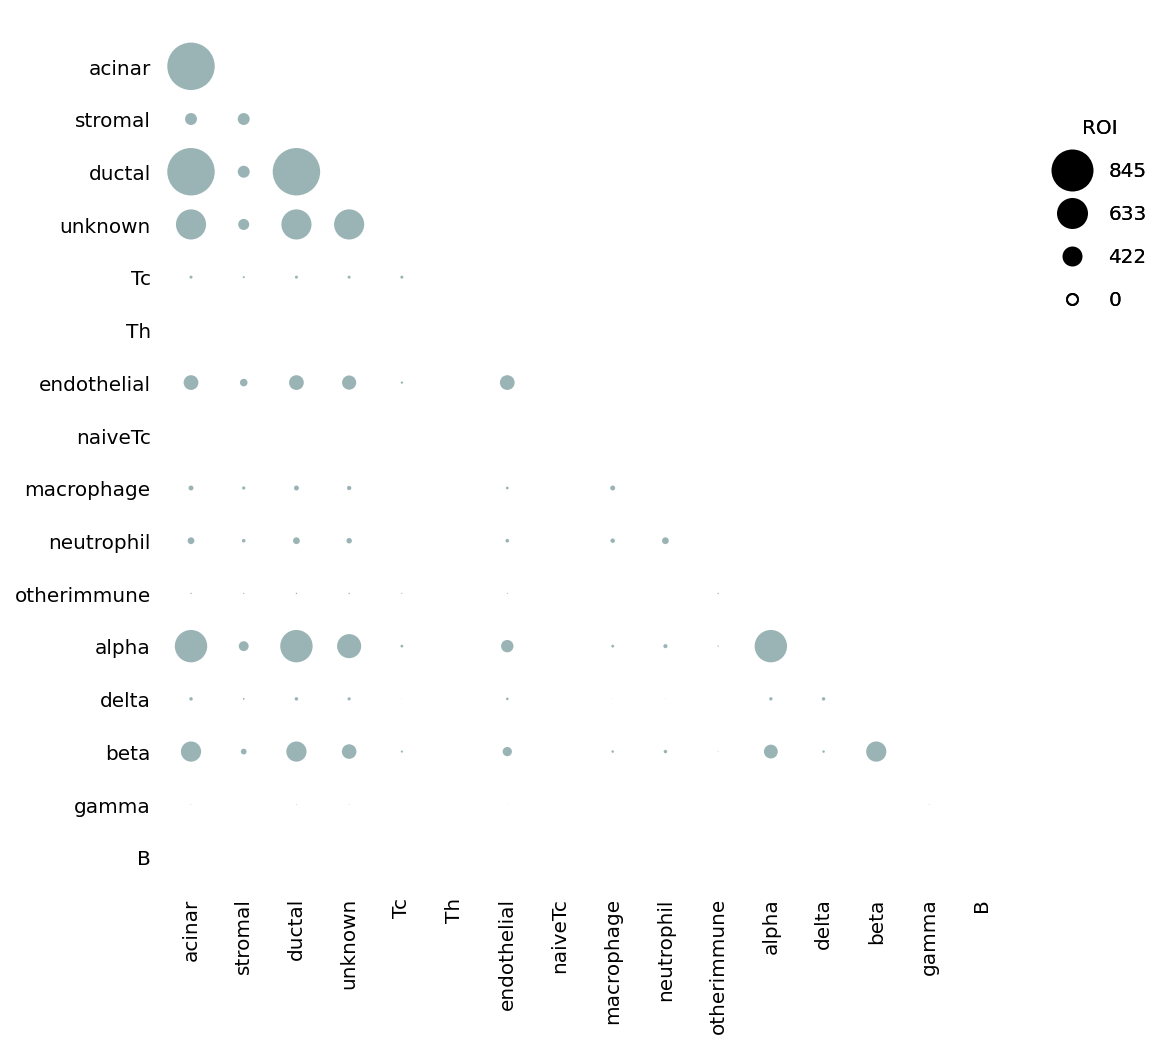

In [8]:
sp.cell_co_occurrence(data)

Everything seems great so far. But, wait a sec!

Do you find the we keep use the same arguments for analysis function?

Good news! SpatialTis allows you to have global configurations. No need to repeat yourself.

## Use global configurations

In [9]:
from spatialtis import CONFIG

CONFIG.EXP_OBS = ["stage", "case", "part", "image"]
CONFIG.CELL_TYPE_KEY = "cell_type" 

Now your code become much cleaner

In [10]:
st.cell_components(data)
st.cell_co_occurrence(data)

To know more about setting configurations in SpatialTis, go on to **2-Setting configurations**

## Retrieve SpatialTis's analysis result

You can read SpatialTis result in dataframe object for further analysis or visualization.

**Method 1**: use argument `return_df=True`

In [11]:
result = st.cell_components(data, return_df=True)

**Method 2**: read from the anndata.uns, if you know the key that store the SpatialTis's results

In [12]:
result = st.adata_uns2df(data, "cell_components")

In [13]:
result.head(5)

type                              acinar  stromal  ductal  unknown  Tc  Th  \
stage         case part image id                                             
Long-duration 6089 Body Q01   0      702        5     237       35   2   2   
                        Q02   1     1344       24     354       52   9   5   
                        Q03   2      863       13     214       46   7   6   
                        Q04   3      938        4     211       30   1   0   
                        Q05   4      764        5     169       22   4   5   

type                              endothelial  naiveTc  macrophage  \
stage         case part image id                                     
Long-duration 6089 Body Q01   0            20        0          50   
                        Q02   1            28        1          63   
                        Q03   2            51        0          39   
                        Q04   3            24        1          27   
                        Q05   4             9        0          12   

type                              neutrophil  otherimmune  alpha  delta  beta  \
stage         case part image id                                                
Long-duration 6089 Body Q01   0           53            7    175     13     0   
                        Q02   1           67           11    148     35     0   
                        Q03   2           70            3    121     23     0   
                        Q04   3           28            0    124     51     0   
                        Q05   4           13            2     81     10     0   

type                              gamma  B  
stage         case part image id            
Long-duration 6089 Body Q01   0       0  1  
                        Q02   1       2  0  
                        Q03   2       0  0  
                        Q04   3       1  0  
                        Q05   4       4  0